In [4]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.linear_model import RidgeCV
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'font.size': 10,
                    'axes.spines.right': False,
                    'axes.spines.top':   False,
                    'legend.frameon':       False,})


# plt.rcParams.update({'font.size': 10,
#                     'axes.spines.right': False,
#                     'axes.spines.top':   False,
#                     'legend.frameon':       False,
#                     'font.sans-serif': 'Helvetica',
#                     'svg.fonttype': 'none'})

In [7]:
from GLM_regression import *

filepath = "SSTindivsomata_GLM.mat"
# filepath = "NDNFindivsomata_GLM.mat"
# filepath = "EC_GLM.mat"

reorganized_data, variable_list = load_data(filepath)
GLM_params = fit_GLM(reorganized_data)
    

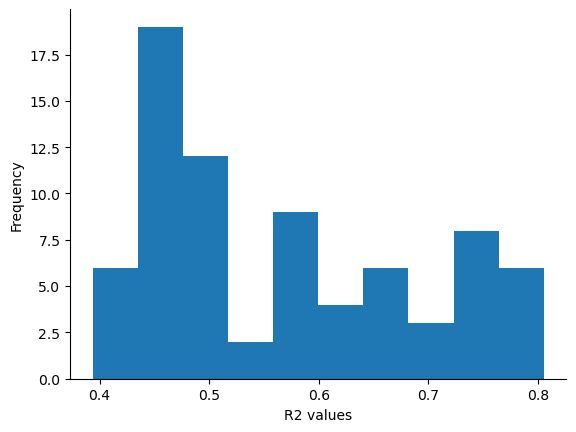

In [8]:
all_R2_values = []
for animal in GLM_params:
    for neuron in GLM_params[animal]:
        all_R2_values.append(GLM_params[animal][neuron]['R2'])
all_R2_values = np.array(all_R2_values)
plt.hist(all_R2_values.flatten(), bins=10)
plt.xlabel("R2 values")
plt.ylabel("Frequency")
plt.show()


R2: 0.8053189988819718
alpha: 1.0


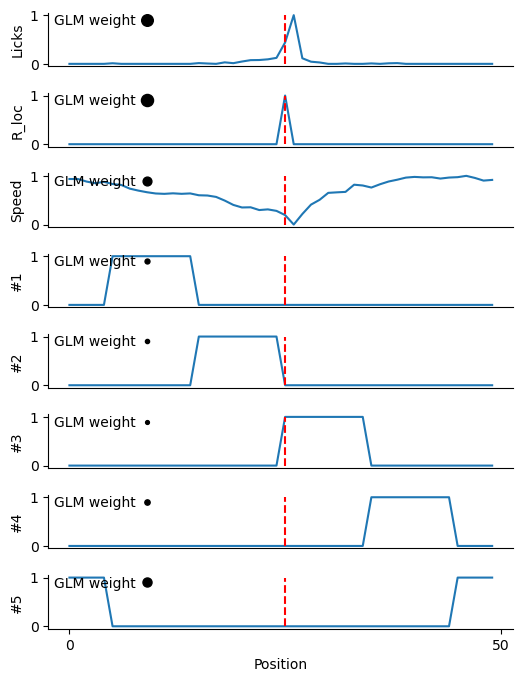

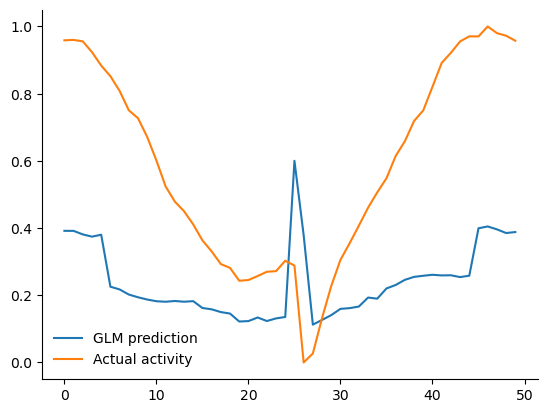

In [9]:
example_animal = 'animal_6'
example_trial = 4
# example_neuron = 1
R2_values = [GLM_params[example_animal][i]['R2'] for i in GLM_params[example_animal]]
example_neuron = np.argmax(R2_values)

R2 = GLM_params[example_animal][example_neuron]['R2']

example_data = np.nanmean(reorganized_data[example_animal][example_neuron][:,:,1:], axis=2)
example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
example_neuron_activity = example_data[:, 0]
example_variables = example_data[:, 1:]

# example_data = reorganized_data[example_animal][example_neuron][:,:,1:]
# example_data = (example_data - np.nanmin(example_data, axis=0)) / (np.nanmax(example_data, axis=0) - np.nanmin(example_data, axis=0))
# example_neuron_activity = example_data[:, 0, example_trial]
# example_variables = example_data[:, 1:, example_trial]


fig = plt.figure(figsize=(6, 8))
axes = gs.GridSpec(nrows=example_variables.shape[1], ncols=1, figure=fig, 
                wspace=0.1, hspace=0.5)

for i in range(example_variables.shape[1]):
    ax = fig.add_subplot(axes[i])
    ax.plot(example_variables[:, i])
    ax.set_ylabel(variable_list[i+1])
    ax.vlines(25, 0, 1, linestyles='--', color='r')
    if i == example_variables.shape[1] - 1:
        ax.set_xlabel('Position')
        ax.set_xticks([0,50])
    else:
        ax.set_xticks([])

    ax.text(0.1, 0.85, 'GLM weight', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.scatter([9],[0.9], c='k', s=GLM_params[example_animal][example_neuron]["weights"][i]*200)


# Plot prediction vs actual neuron activity
glm_model = GLM_params[example_animal][example_neuron]['model']
predicted_activity = glm_model.predict(example_variables)
pred_norm = (predicted_activity - np.min(predicted_activity)) / (np.max(predicted_activity) - np.min(predicted_activity))
actual_norm = (example_neuron_activity - np.min(example_neuron_activity)) / (np.max(example_neuron_activity) - np.min(example_neuron_activity))

print("R2:", GLM_params[example_animal][example_neuron]['R2'])
print("alpha:", GLM_params[example_animal][example_neuron]['alpha'])

plt.figure()
plt.plot(predicted_activity, label='GLM prediction')
plt.plot(example_neuron_activity, label='Actual activity')

# plt.plot(pred_norm, label='GLM prediction', c='gray', linestyle='--')
# plt.plot(actual_norm, label='Actual activity', c='k')
plt.legend()


<BarContainer object of 8 artists>

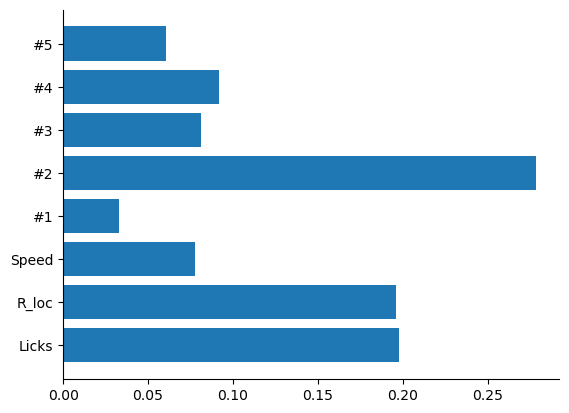

In [367]:
neuron_nr = 2

# Bar graph
plt.barh(variable_list[1:], GLM_params['animal_1'][neuron_nr]['weights'])

ValueError: x and y must be the same size

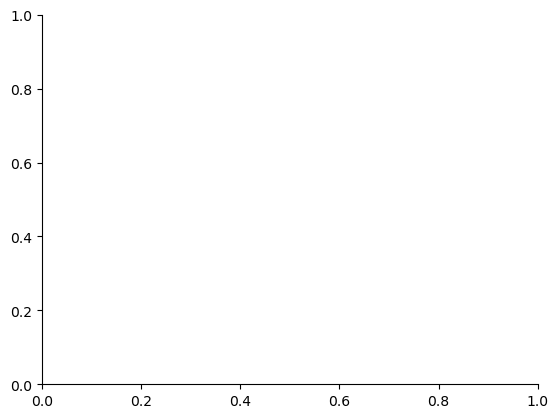

In [13]:
animal_averages = []
animal_stds = []

jitter_strength = 0.28

for animal_key in GLM_params:
    neuron_weights = []
    for neuron_nr in range(len(GLM_params[animal_key])):
        neuron_weights.append(GLM_params[animal_key][neuron_nr]['weights'])        
        jittered_x = np.arange(len(variable_list[1:])) + np.random.uniform(-jitter_strength, jitter_strength, len(variable_list[1:]))
        plt.scatter(jittered_x, GLM_params[animal_key][neuron_nr]['weights'], color='grey', alpha=0.5)
    
    neuron_weights = np.array(neuron_weights)
    mean_weights = np.mean(neuron_weights, axis=0)
    std_weights = np.std(neuron_weights, axis=0)  # Use standard deviation
    
    animal_averages.append(mean_weights)
    animal_stds.append(std_weights)    
    plt.scatter(range(len(variable_list[1:])), mean_weights, color='black', label=f'Animal {animal_key}', s=100)

animal_averages = np.array(animal_averages)
animal_stds = np.array(animal_stds)

global_mean = np.mean(animal_averages, axis=0)
global_std = np.std(animal_averages, axis=0)
plt.errorbar(range(len(variable_list[1:])), global_mean, yerr=global_std, fmt='o', color='red', ecolor='red', 
             capsize=5, label='Average of all animals', markersize=10)

plt.xticks(range(len(variable_list[1:])), variable_list[1:], rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Weights')
plt.title('Neuron Weights Scatter Plot')

plt.hlines(0, 0, len(variable_list[1:]), linestyles='--', color='black', alpha=0.5)

plt.tight_layout()
plt.show()
